In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def compute_average_task_time(task_name, evaluation_dict):
    
    task_time = 0
    for result_dict in evaluation_dict.values():
        task_time += result_dict[task_name]
        
    return task_time / len(evaluation_dict.values())

In [3]:
def get_distribution(evaluation_path):
    
    with open(evaluation_path, 'r') as f:
        evaluation_dict = json.load(f)
    
    euler_gnccs = []
    raw_gnccs = []
    
    for result_dict in evaluation_dict.values():
        euler_gnccs.append(result_dict['euler_gncc'])
        raw_gnccs.append(result_dict['raw_gncc'])
    
    return euler_gnccs, raw_gnccs

In [31]:
def plot_time_pie(times, factor):

    sorted_data = sorted(times)
    tasks = ["prep_inputs", "grid_search", "search_z", "downsample", "update_memory_dict"]

    # Create a colormap
    colormap = plt.cm.viridis  # you can choose any available colormap

    # Generate a list of colors based on the normalized values of your sorted data
    norm = plt.Normalize(min(sorted_data), max(sorted_data))
    
    colors = [colormap(norm(value)) for value in sorted_data]
    plt.pie(sorted_data, labels=[round(data, 2) for _, data in enumerate(sorted_data)], colors=colors)
    plt.title(f'time distribution for r{factor}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Show color bar
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, orientation='vertical')
    labels = [f"{tasks[i]}: {round(data, 2)} sec" for i, data in enumerate(times)]
    plt.legend(labels, loc="best")
    plt.show()

In [5]:
factor = 1

evaluation_path = f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d8_r1.json'

with open(evaluation_path, 'r') as f:
    evaluation_d1 = json.load(f)

d1dx_list = []
d1dy_list = []
d1dtheta_list = []

for result_dict in evaluation_d1.values():
    dx, dy, dtheta, _ = result_dict["parameters"]
    d1dx_list.append(dx)
    d1dy_list.append(dy)
    d1dtheta_list.append(dtheta)

In [12]:
evaluation_path = f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d8_r2.json'

with open(evaluation_path, 'r') as f:
    evaluation_d2 = json.load(f)
    
d2dx_list = []
d2dy_list = []
d2dtheta_list = []

for result_dict in evaluation_d2.values():
    dx, dy, dtheta, _ = result_dict["parameters"]
    d2dx_list.append(dx)
    d2dy_list.append(dy)
    d2dtheta_list.append(dtheta)

In [7]:
evaluation_path = f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d8_r4.json'

with open(evaluation_path, 'r') as f:
    evaluation_d4 = json.load(f)
    
d4dx_list = []
d4dy_list = []
d4dtheta_list = []

for result_dict in evaluation_d4.values():
    dx, dy, dtheta, _ = result_dict["parameters"]
    d4dx_list.append(dx)
    d4dy_list.append(dy)
    d4dtheta_list.append(dtheta)

FileNotFoundError: [Errno 2] No such file or directory: '/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d8_r4.json'

In [8]:
evaluation_path = f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d8_r5.json'

with open(evaluation_path, 'r') as f:
    evaluation_d5 = json.load(f)
    
d5dx_list = []
d5dy_list = []
d5dtheta_list = []

for result_dict in evaluation_d5.values():
    dx, dy, dtheta, _ = result_dict["parameters"]
    d5dx_list.append(dx)
    d5dy_list.append(dy)
    d5dtheta_list.append(dtheta)

In [10]:
evaluation_path = f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d8_r10.json'

with open(evaluation_path, 'r') as f:
    evaluation_d10 = json.load(f)
    
d10dx_list = []
d10dy_list = []
d10dtheta_list = []

for result_dict in evaluation_d10.values():
    dx, dy, dtheta, _ = result_dict["parameters"]
    d10dx_list.append(dx)
    d10dy_list.append(dy)
    d10dtheta_list.append(dtheta)

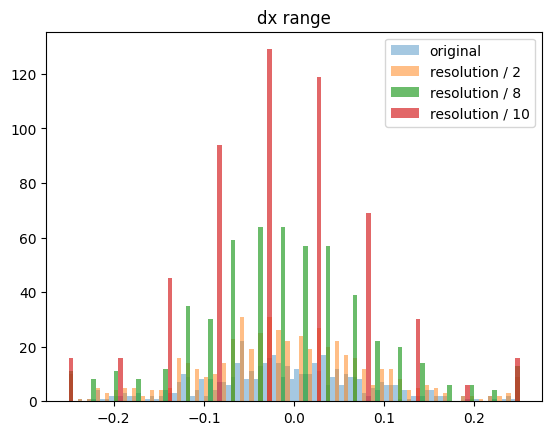

In [14]:
import matplotlib.pyplot as plt

plt.hist(d1dx_list, bins=100, alpha=0.4, label='original');
plt.hist(d2dx_list, bins=100, alpha=0.5, label='resolution / 2');
# plt.hist(d4dx_list, bins=100, alpha=0.6, label='resolution / 4');
plt.hist(d5dx_list, bins=100, alpha=0.7, label='resolution / 8');
plt.hist(d10dx_list, bins=100, alpha=0.7, label='resolution / 10');
plt.title("dx range");
plt.legend();

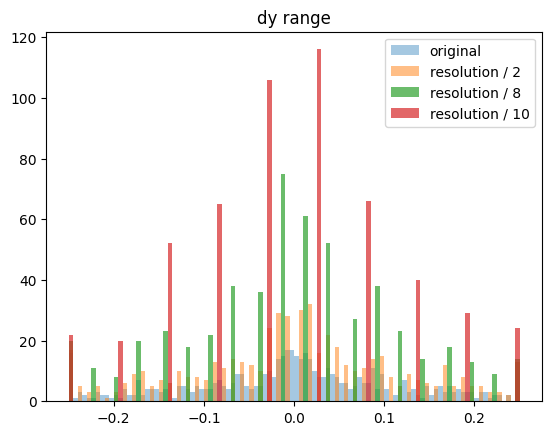

In [15]:

plt.hist(d1dy_list, bins=100, alpha=0.4, label='original');
plt.hist(d2dy_list, bins=100, alpha=0.5, label='resolution / 2');
# plt.hist(d4dx_list, bins=100, alpha=0.6, label='resolution / 4');
plt.hist(d5dy_list, bins=100, alpha=0.7, label='resolution / 2');
plt.hist(d10dy_list, bins=100, alpha=0.7, label='resolution / 10');
plt.title("dy range");
plt.legend();

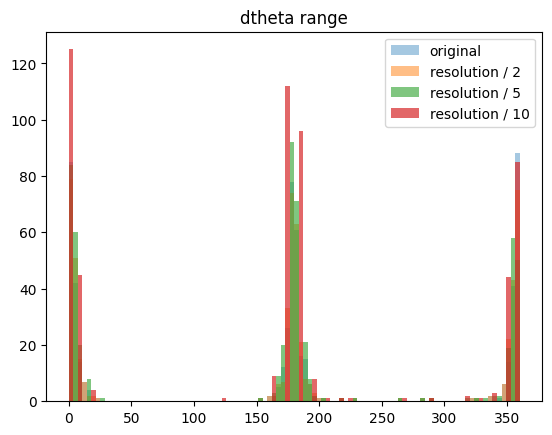

In [16]:
import numpy as np

plt.hist([np.degrees(theta) for theta in d1dtheta_list], bins=100, alpha=0.4, label='original');
plt.hist([np.degrees(theta) for theta in d2dtheta_list], bins=100, alpha=0.5, label='resolution / 2');
plt.hist([np.degrees(theta) for theta in d5dtheta_list], bins=100, alpha=0.6, label='resolution / 5');
plt.hist([np.degrees(theta) for theta in d10dtheta_list], bins=100, alpha=0.7, label='resolution / 10')
plt.title("dtheta range");
plt.legend();

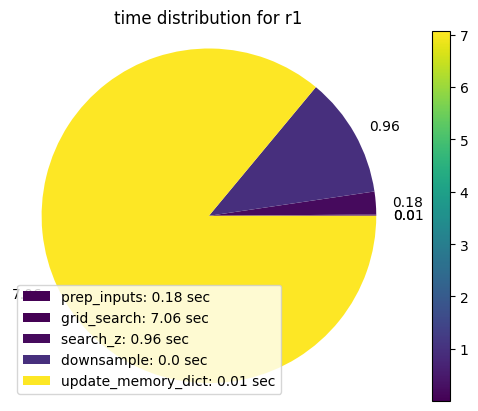

In [32]:
evaluation = evaluation_d1

mean_time_prep_inputs = compute_average_task_time('time_prep_inputs', evaluation)
mean_time_grid_search = compute_average_task_time('time_grid_search', evaluation)
mean_time_search_z = compute_average_task_time('time_search_z', evaluation)
mean_time_downsample = compute_average_task_time('time_downsample', evaluation)
mean_time_update_memory_dict = compute_average_task_time('time_update_memory_dict', evaluation)

factor = 1
plot_time_pie([mean_time_prep_inputs,
               mean_time_grid_search,
               mean_time_search_z,
               mean_time_downsample,
               mean_time_update_memory_dict], factor);

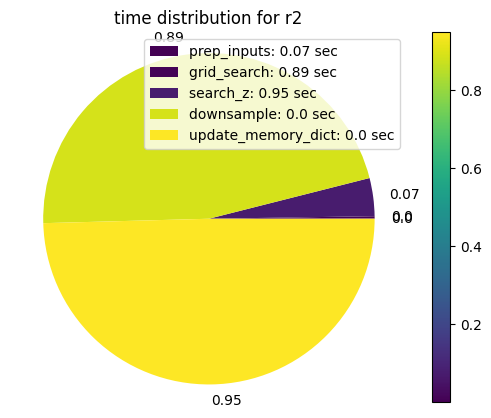

In [33]:
evaluation = evaluation_d2

mean_time_prep_inputs = compute_average_task_time('time_prep_inputs', evaluation)
mean_time_grid_search = compute_average_task_time('time_grid_search', evaluation)
mean_time_search_z = compute_average_task_time('time_search_z', evaluation)
mean_time_downsample = compute_average_task_time('time_downsample', evaluation)
mean_time_update_memory_dict = compute_average_task_time('time_update_memory_dict', evaluation)

factor = 2
plot_time_pie([mean_time_prep_inputs,
               mean_time_grid_search,
               mean_time_search_z,
               mean_time_downsample,
               mean_time_update_memory_dict], factor);

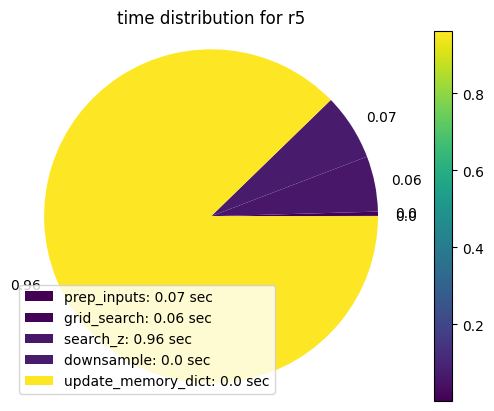

In [34]:
evaluation = evaluation_d5

mean_time_prep_inputs = compute_average_task_time('time_prep_inputs', evaluation)
mean_time_grid_search = compute_average_task_time('time_grid_search', evaluation)
mean_time_search_z = compute_average_task_time('time_search_z', evaluation)
mean_time_downsample = compute_average_task_time('time_downsample', evaluation)
mean_time_update_memory_dict = compute_average_task_time('time_update_memory_dict', evaluation)

factor = 5
plot_time_pie([mean_time_prep_inputs,
               mean_time_grid_search,
               mean_time_search_z,
               mean_time_downsample,
               mean_time_update_memory_dict], factor);

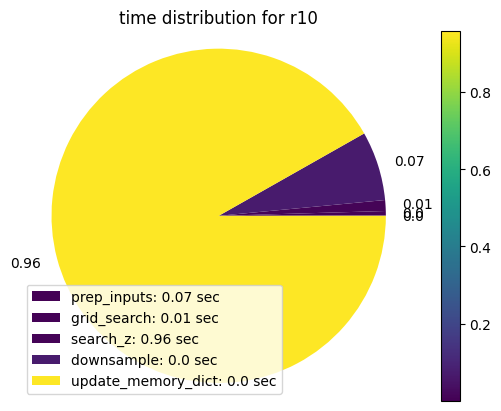

In [35]:
evaluation = evaluation_d10

mean_time_prep_inputs = compute_average_task_time('time_prep_inputs', evaluation)
mean_time_grid_search = compute_average_task_time('time_grid_search', evaluation)
mean_time_search_z = compute_average_task_time('time_search_z', evaluation)
mean_time_downsample = compute_average_task_time('time_downsample', evaluation)
mean_time_update_memory_dict = compute_average_task_time('time_update_memory_dict', evaluation)

factor = 10
plot_time_pie([mean_time_prep_inputs,
               mean_time_grid_search,
               mean_time_search_z,
               mean_time_downsample,
               mean_time_update_memory_dict], factor);

In [17]:

euler_gnccs_d1, raw_gnccs = get_distribution(f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d1.json')
euler_gnccs_d2, raw_gnccs = get_distribution(f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d2.json')
euler_gnccs_d4, raw_gnccs = get_distribution(f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d4.json')
euler_gnccs_d8, raw_gnccs = get_distribution(f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d8.json')

In [24]:
max(euler_gnccs_d8), max(euler_gnccs_d1)

(0.8931521773338318, 0.9191868305206299)

(0.1, 1.0)

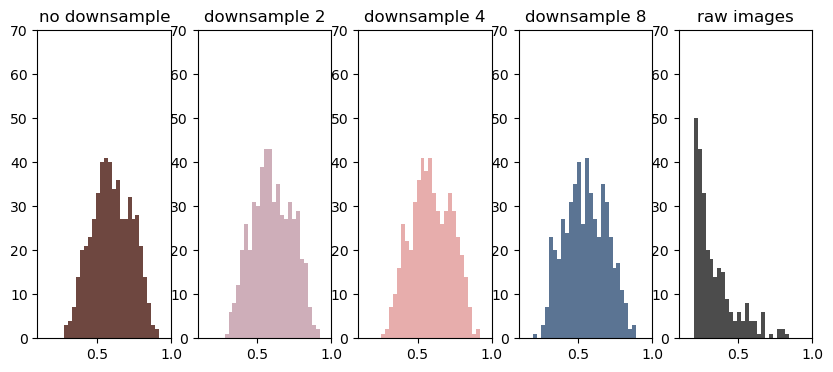

In [43]:
fig, axes = plt.subplots(1, 5, figsize=(10, 4))

y_max = 70
x_min = 0.1

bin_edges = np.linspace(0.2, 1, 31)
axes[0].hist(euler_gnccs_d1, bins=bin_edges, color='#6E4740')
axes[0].set_title('no downsample')
axes[0].set_ylim([0, y_max])
axes[0].set_xlim([x_min, 1])

axes[1].hist(euler_gnccs_d2, bins=bin_edges, color='#CEAEB9')
axes[1].set_title('downsample 2')
axes[1].set_ylim([0, y_max])
axes[1].set_xlim([x_min, 1])

axes[2].hist(euler_gnccs_d4, bins=bin_edges, color='#E7ADAC')
axes[2].set_title('downsample 4')
axes[2].set_ylim([0, y_max])
axes[2].set_xlim([x_min, 1])

axes[3].hist(euler_gnccs_d8, bins=bin_edges, color='#5B7493')
axes[3].set_title('downsample 8')
axes[3].set_ylim([0, y_max])
axes[3].set_xlim([x_min, 1])


axes[4].hist(raw_gnccs, bins=bin_edges, color='black', alpha=0.7)
axes[4].set_title('raw images')
axes[4].set_ylim([0, y_max])
axes[4].set_xlim([x_min, 1])

In [28]:

euler_gnccs_d1, raw_gnccs = get_distribution(f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d8_r1.json')
euler_gnccs_d2, raw_gnccs = get_distribution(f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d8_r2.json')
euler_gnccs_d5, raw_gnccs = get_distribution(f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d8_r5.json')
euler_gnccs_d8, raw_gnccs = get_distribution(f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d8_r10.json')
euler_gnccs_d10, raw_gnccs = get_distribution(f'/home/alicia/data_personal/benchmark/euler_gpu_evaluation_d8_r10.json')


In [29]:
min(euler_gnccs_d1), min(euler_gnccs_d10)

(0.1491142131543042, 0.14599572140828226)

(0.1, 1.0)

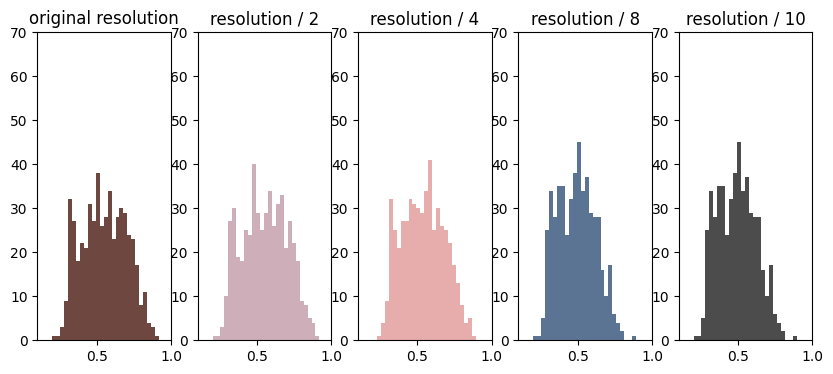

In [30]:
fig, axes = plt.subplots(1, 5, figsize=(10, 4))

y_max = 70
x_min = 0.1

bin_edges = np.linspace(0.2, 1, 31)
axes[0].hist(euler_gnccs_d1, bins=bin_edges, color='#6E4740')
axes[0].set_title('original resolution')
axes[0].set_ylim([0, y_max])
axes[0].set_xlim([x_min, 1])

axes[1].hist(euler_gnccs_d2, bins=bin_edges, color='#CEAEB9')
axes[1].set_title('resolution / 2')
axes[1].set_ylim([0, y_max])
axes[1].set_xlim([x_min, 1])

axes[2].hist(euler_gnccs_d5, bins=bin_edges, color='#E7ADAC')
axes[2].set_title('resolution / 4')
axes[2].set_ylim([0, y_max])
axes[2].set_xlim([x_min, 1])

axes[3].hist(euler_gnccs_d8, bins=bin_edges, color='#5B7493')
axes[3].set_title('resolution / 8')
axes[3].set_ylim([0, y_max])
axes[3].set_xlim([x_min, 1])


axes[4].hist(euler_gnccs_d10, bins=bin_edges, color='black', alpha=0.7)
axes[4].set_title('resolution / 10')
axes[4].set_ylim([0, y_max])
axes[4].set_xlim([x_min, 1])